# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [ ]:
a = torch.randn((3, 4), dtype=torch.float)
print("Тензор a:")
print(a)

b = torch.randn((12,), dtype=torch.float)
print("Тензор b:")
print(b)

c = b.view(2, 2, 3)
print("Тензор c:")
print(c)

a_first_column = a[:, 0]
print("Первый столбец матрицы a:")
print(a_first_column)

Тензор a:
tensor([[-0.1648,  0.4250,  0.3488,  1.7058],
        [-1.7219,  1.9930,  1.4100, -1.9291],
        [ 0.6699,  0.2412,  0.2221, -1.6056]])
Тензор b:
tensor([-0.7661, -0.7307, -0.4004,  0.8161,  0.1223,  0.2406,  2.4612,  0.3817,
         0.4430, -1.6768,  0.3920, -0.8736])
Тензор c:
tensor([[[-0.7661, -0.7307, -0.4004],
         [ 0.8161,  0.1223,  0.2406]],

        [[ 2.4612,  0.3817,  0.4430],
         [-1.6768,  0.3920, -0.8736]]])
Первый столбец матрицы a:
tensor([-0.1648, -1.7219,  0.6699])


### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [ ]:
a = torch.randn((5, 2), dtype=torch.float)
b = torch.randn((1, 10), dtype=torch.float)

c = b.view(5, 2)

print("Тензор a:")
print(a)
print("Тензор c:")
print(c)

Тензор a:
tensor([[-1.1327, -0.2692],
        [ 1.8021, -0.0166],
        [ 0.3581, -0.3298],
        [-0.5715,  0.0404],
        [-0.1632, -2.5569]])
Тензор c:
tensor([[-1.2672, -0.0091],
        [ 1.1549, -0.0429],
        [-1.3443,  0.5262],
        [-0.2794,  0.5425],
        [-0.1194,  0.0448]])


In [ ]:
print(a + c)

tensor([[-2.3999, -0.2784],
        [ 2.9571, -0.0595],
        [-0.9861,  0.1964],
        [-0.8509,  0.5830],
        [-0.2825, -2.5121]])


In [ ]:
print(a - c)

tensor([[ 0.1346, -0.2601],
        [ 0.6472,  0.0264],
        [ 1.7024, -0.8560],
        [-0.2921, -0.5021],
        [-0.0438, -2.6017]])


In [ ]:
print(a * c)

tensor([[ 1.4354e+00,  2.4603e-03],
        [ 2.0813e+00,  7.1169e-04],
        [-4.8145e-01, -1.7354e-01],
        [ 1.5966e-01,  2.1940e-02],
        [ 1.9476e-02, -1.1450e-01]])


In [ ]:
print(a / c)

tensor([[  0.8938,  29.4621],
        [  1.5604,   0.3860],
        [ -0.2664,  -0.6268],
        [  2.0456,   0.0745],
        [  1.3669, -57.0992]])


### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

In [ ]:
images = torch.zeros((100, 200, 200, 3), dtype=torch.int32)

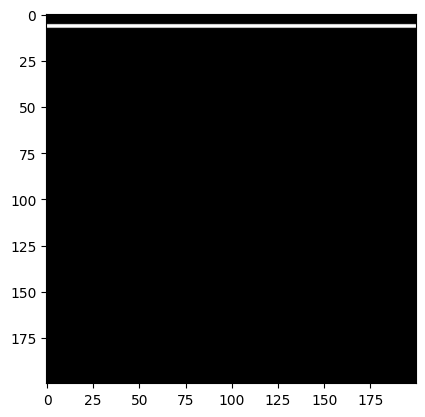

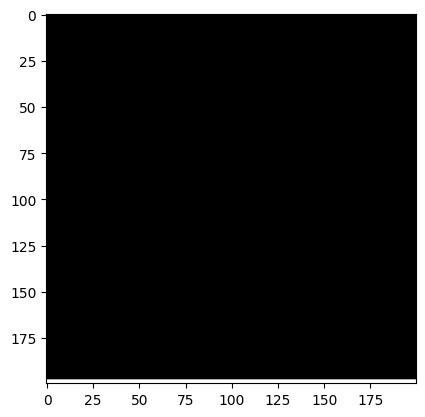

In [ ]:
for i in range(images.shape[0]):
    images[i, i*2:i*2+2, :, :] = 255

# Выводим несколько примеров
plt.imshow(images[3].int())
plt.show()

plt.imshow(images[99].int())
plt.show()

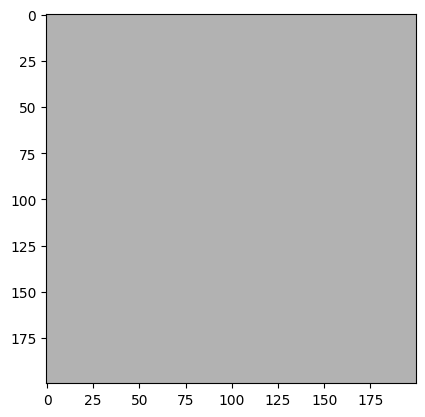

In [ ]:
mean_images = torch.mean(images.float(), 0) * 70
plt.imshow(mean_images.int())

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [ ]:
a = torch.empty((2, 3, 4), device='cuda').uniform_()
b = torch.empty((1, 8, 3), device='cuda').uniform_()

In [ ]:
#print(a)
#print(b)

c = b.view(a.size())

In [ ]:
print(a)
print(b)
print(c)

tensor([[[0.4628, 0.0332, 0.5773, 0.4944],
         [0.3023, 0.1239, 0.3519, 0.8811],
         [0.3181, 0.5317, 0.5673, 0.8939]],

        [[0.4124, 0.6077, 0.1344, 0.7576],
         [0.1259, 0.6206, 0.8790, 0.8429],
         [0.8374, 0.5735, 0.2104, 0.5655]]], device='cuda:0')
tensor([[[0.5775, 0.2408, 0.0023],
         [0.4322, 0.6827, 0.4616],
         [0.2277, 0.3760, 0.7889],
         [0.2764, 0.4590, 0.5796],
         [0.6281, 0.9437, 0.0595],
         [0.9046, 0.5545, 0.1314],
         [0.3504, 0.2209, 0.3044],
         [0.9353, 0.8592, 0.0858]]], device='cuda:0')
tensor([[[0.5775, 0.2408, 0.0023, 0.4322],
         [0.6827, 0.4616, 0.2277, 0.3760],
         [0.7889, 0.2764, 0.4590, 0.5796]],

        [[0.6281, 0.9437, 0.0595, 0.9046],
         [0.5545, 0.1314, 0.3504, 0.2209],
         [0.3044, 0.9353, 0.8592, 0.0858]]], device='cuda:0')


In [ ]:
c = c.to('cpu')
a = a.to('cpu')

In [ ]:
from torch.autograd import Variable

a, c = Variable(a), Variable(c, requires_grad=True)

In [ ]:
L = torch.mean((c - a)**2)
#print(L)

In [ ]:
L.backward()
L_gradient_c = c.grad

print(L_gradient_c)

tensor([[[ 0.0096,  0.0173, -0.0479, -0.0052],
         [ 0.0317,  0.0281, -0.0103, -0.0421],
         [ 0.0392, -0.0213, -0.0090, -0.0262]],

        [[ 0.0180,  0.0280, -0.0062,  0.0123],
         [ 0.0357, -0.0408, -0.0441, -0.0518],
         [-0.0444,  0.0301,  0.0541, -0.0400]]])
